In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('car_purchasing.csv',encoding='Latin-1')

In [3]:
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [4]:
df.drop(columns=['customer name','customer e-mail','country','gender'],inplace=True)

In [5]:
df.head()

,age,annual Salary,credit card debt,net worth,car purchase amount
0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [6]:
df['age'] = df['age'].round().astype('int')
df['annual Salary'] = df['annual Salary'].round().astype('int')
df['credit card debt'] = df['credit card debt'].round().astype('int')
df['net worth'] = df['net worth'].round().astype('int')
df['car purchase amount'] = df['car purchase amount'].round().astype('int')

In [7]:
df.rename(columns={'annual Salary':'annual_salary','credit card debt':'credit_card_debt','net worth':'net_worth','car purchase amount':'car_purchase_amount'},inplace=True)

In [8]:
df.head()

,age,annual_salary,credit_card_debt,net_worth,car_purchase_amount
0,42,62812,11609,238961,35321
1,41,66647,9573,530974,45116
2,43,53799,11160,638467,42926
3,58,79370,14426,548599,67422
4,57,59729,5359,560304,55915


In [9]:
df.describe()

,age,annual_salary,credit_card_debt,net_worth,car_purchase_amount
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,46.224000,62127.222000,9607.644000,431475.700000,44209.808000
std,7.990339,11703.386599,3489.180032,173536.758223,10773.145934
min,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,41.000000,54392.000000,7397.500000,299824.000000,37629.750000
50%,46.000000,62915.500000,9655.000000,426750.000000,43997.500000
75%,52.000000,70118.250000,11799.000000,557324.500000,51254.750000
max,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [10]:
out_col = ['age','annual_salary','credit_card_debt','net_worth']

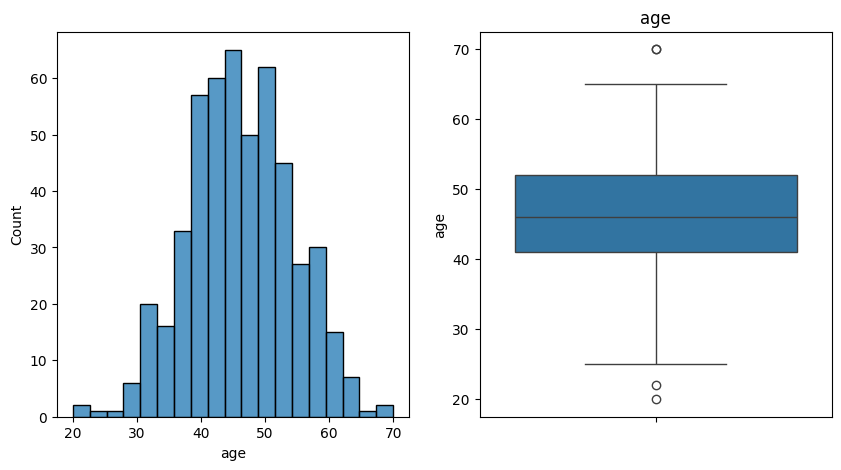

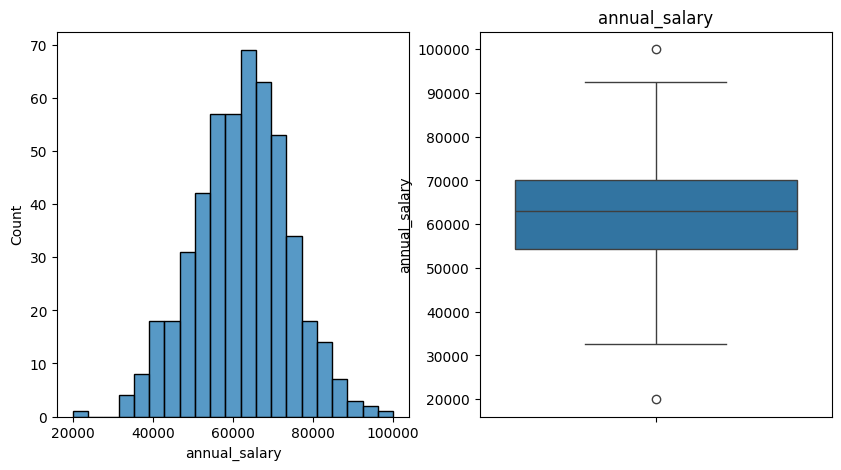

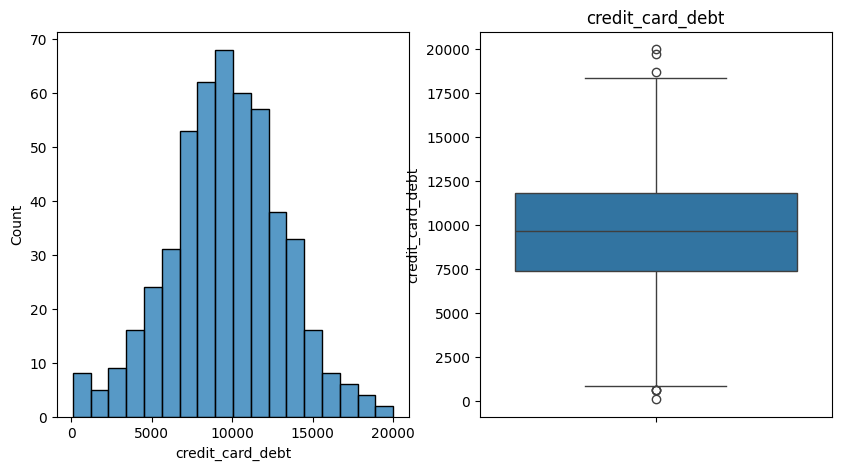

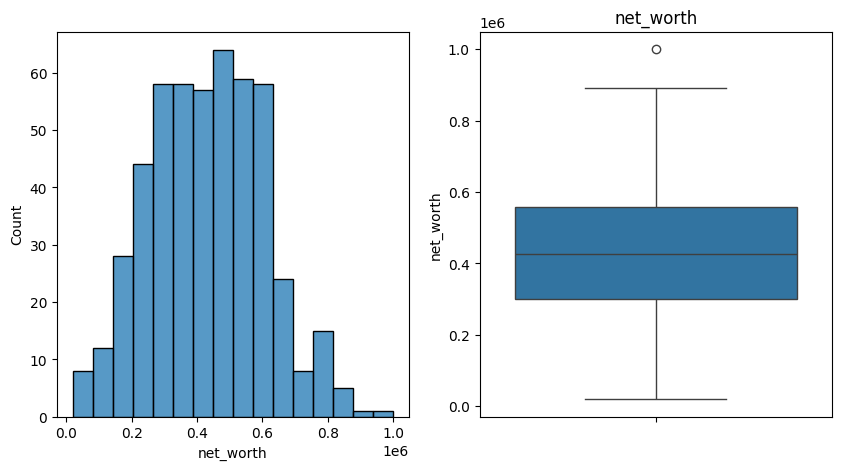

In [11]:
for col in out_col:
    plt.figure(figsize=(10,5))
    plt.subplot(121)
    sns.histplot(df[col])
    
    plt.subplot(122)
    sns.boxplot(df[col])
    plt.title(col)
    plt.show()

In [12]:
for out in out_col:
    q1 = df[out].quantile(0.25)
    q3 = df[out].quantile(0.75)
    IQR =  q3-q1
    min = q1 - 1.5 * IQR
    max = q3 + 1.5 * IQR
    print(min,max)
    df = df[(df[out] >=min) & (df[out] <=max)]

24.5 68.5
30937.0 93627.0
858.875 18313.875
-88007.5 944884.5


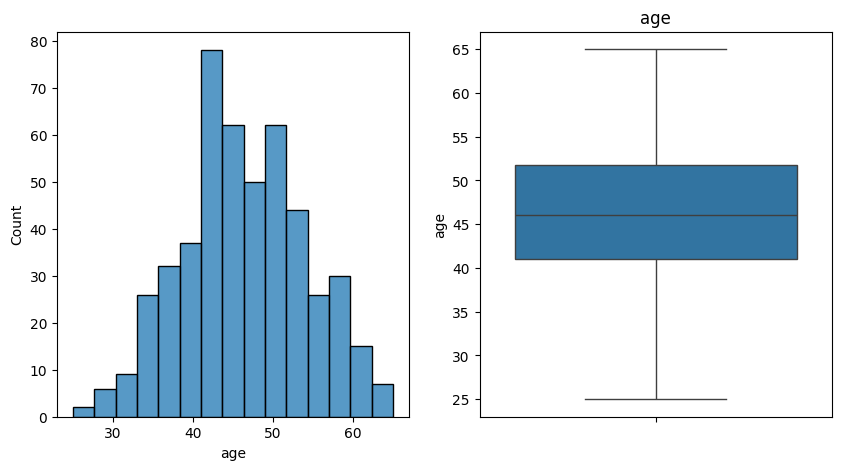

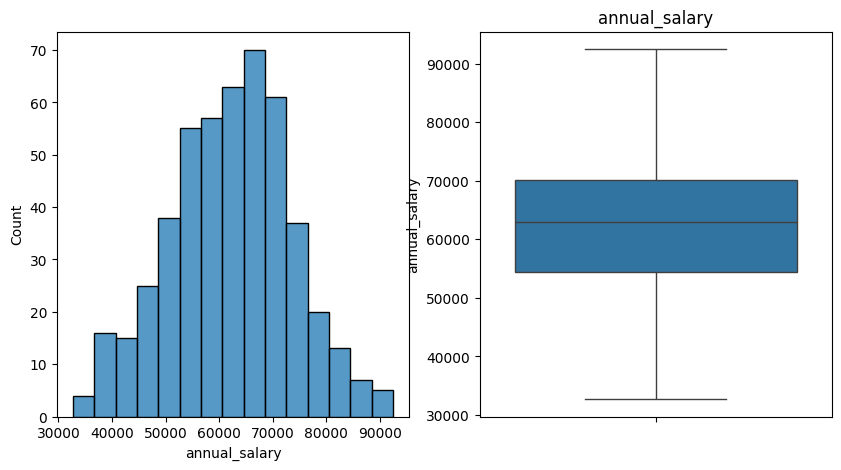

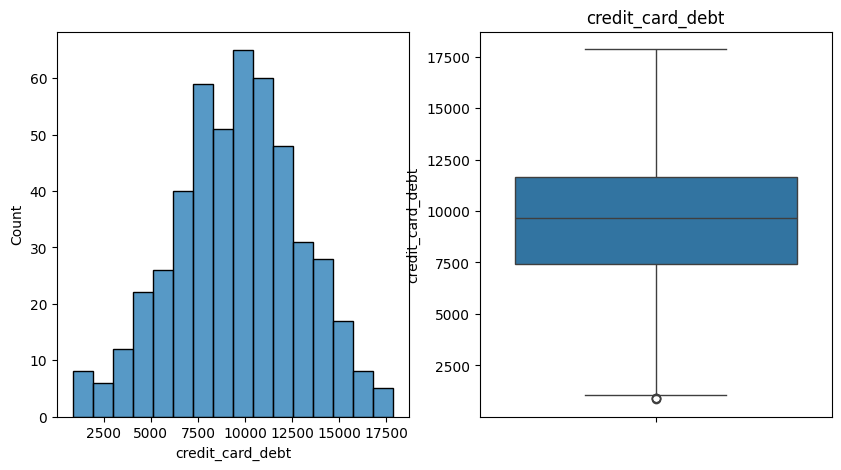

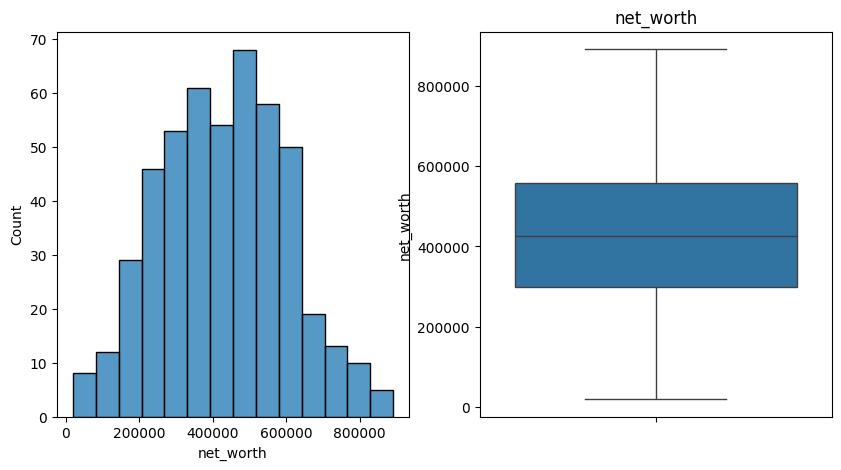

In [13]:
for col in out_col:
    plt.figure(figsize=(10,5))
    plt.subplot(121)
    sns.histplot(df[col])
    
    plt.subplot(122)
    sns.boxplot(df[col])
    plt.title(col)
    plt.show()

In [14]:
df.head()

,age,annual_salary,credit_card_debt,net_worth,car_purchase_amount
0,42,62812,11609,238961,35321
1,41,66647,9573,530974,45116
2,43,53799,11160,638467,42926
3,58,79370,14426,548599,67422
4,57,59729,5359,560304,55915


In [15]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [16]:
print(X.shape)
print(Y.shape)

(486, 4)
(486,)


In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [18]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(388, 4)
(98, 4)
(388,)
(98,)


In [19]:
import tensorflow

In [20]:
from tensorflow import  keras 
from keras import Sequential
from keras.layers import Dense,Dropout

In [21]:
model = Sequential()

In [22]:
model.add(Dense(128,activation='relu',input_dim=4))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='linear'))

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,961 (35.00 KB)

 Trainable params: 8,961 (35.00 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(optimizer='adam',loss='mse')

In [25]:
history = model.fit(x_train,y_train,epochs=20,validation_split=0.2)

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 517392640.0000 - val_loss: 241686672.0000
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 224753104.0000 - val_loss: 123204232.0000
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 114571944.0000 - val_loss: 60147396.0000
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 61880496.0000 - val_loss: 64421132.0000
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 51708052.0000 - val_loss: 47189796.0000
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 46318148.0000 - val_loss: 49693532.0000
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 36804812.0000 - val_loss: 47115076.0000
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 44197444.0000 - val_loss: 52853740.0000
Epoch 9/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 45543580.0000 - val_loss: 44141604.0000
Epoch 10/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 41633604.0000 - val_loss: 47338220.0000
Epoch 11/20
1

In [26]:
y_pred = model.predict(x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [27]:
from sklearn.metrics import r2_score,mean_squared_error,median_absolute_error
print('r2_score:-',r2_score(y_test,y_pred))
print('msqr:-',mean_squared_error(y_test,y_pred))
print('mae:-',median_absolute_error(y_test,y_pred))

r2_score:- 0.5867558573196819
msqr:- 51001548.41527522
mae:- 4600.375


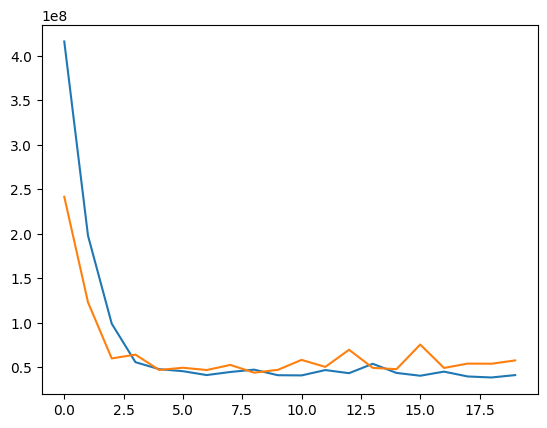

In [28]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [29]:
input_data = (58,79370,14426,548599)
data = np.asarray(input_data).reshape(1,-1)
model.predict(data)[0][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


52523.04

In [31]:
model.save('model.keras')